Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [6]:
SELECTED_POSITION = "Half-Forward"

position_role_stats = {
    'goal_scoring' : [
        'Goals',
        'Score',
        'xScore',
        'xScore_Diff',
        'Shots_At_Goal',
        'xT_received',
        'vaep_value_received',
        'offensive_value',
        'exp_vaep_value_received',
        'exp_offensive_value'
    ],
    'goal_creating' : [
        'Score_Involvements',
        'Score_Launches',
        'Inside_50s',
        'xT_created',
        'vaep_value',
        'offensive_value',
        'exp_vaep_value',
        'exp_offensive_value'
    ],
    'contest' : [
        'Contested_Marks',
        'Contested_Possessions',
        'Offensive_One_On_One_Contests',
        'Offensive_Contest_Wins',
        'Inside_50_Ground_Ball_Gets',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [7]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

,,,Games,Age,Height,Weight,Debut_Year,Draft_Position,Offensive_Contest_Wins_sum,xScore_sum,Offensive_One_On_One_Contests_sum,Shots_At_Goal_sum,offensive_value_sum,vaep_value_sum,Score_Launches_sum,Goals_sum,Contested_Possessions_sum,vaep_value_received_sum,Score_sum,xT_received_sum,Possessions_sum,xScore_Diff_sum,Contested_Marks_sum,xT_created_sum,Score_Involvements_sum,exp_vaep_value_sum,exp_vaep_value_received_sum,Inside_50s_sum,Inside_50_Ground_Ball_Gets_sum,Uncontested_Possessions_sum,exp_offensive_value_sum,Percent_Played_sum,Offensive_Contest_Wins_pergame,Offensive_Contest_Wins_per100,xScore_pergame,xScore_per100,Offensive_One_On_One_Contests_pergame,Offensive_One_On_One_Contests_per100,Shots_At_Goal_pergame,Shots_At_Goal_per100,offensive_value_pergame,offensive_value_per100,vaep_value_pergame,vaep_value_per100,Score_Launches_pergame,Score_Launches_per100,Goals_pergame,Goals_per100,Contested_Possessions_pergame,Contested_Possessions_per100,vaep_value_received_pergame,vaep_value_received_per100,Score_pergame,Score_per100,xT_received_pergame,xT_received_per100,Possessions_pergame,Possessions_per100,xScore_Diff_pergame,xScore_Diff_per100,Contested_Marks_pergame,Contested_Marks_per100,xT_created_pergame,xT_created_per100,Score_Involvements_pergame,Score_Involvements_per100,exp_vaep_value_pergame,exp_vaep_value_per100,exp_vaep_value_received_pergame,exp_vaep_value_received_per100,Inside_50s_pergame,Inside_50s_per100,Inside_50_Ground_Ball_Gets_pergame,Inside_50_Ground_Ball_Gets_per100,Uncontested_Possessions_pergame,Uncontested_Possessions_per100,exp_offensive_value_pergame,exp_offensive_value_per100,Offensive_Contest_Wins_per100_z,xScore_per100_z,Offensive_One_On_One_Contests_per100_z,Shots_At_Goal_per100_z,offensive_value_per100_z,vaep_value_per100_z,Score_Launches_per100_z,Goals_per100_z,Contested_Possessions_per100_z,vaep_value_received_per100_z,Score_per100_z,xT_received_per100_z,Possessions_per100_z,xScore_Diff_per100_z,Contested_Marks_per100_z,xT_created_per100_z,Score_Involvements_per100_z,exp_vaep_value_per100_z,exp_vaep_value_received_per100_z,Inside_50s_per100_z,Inside_50_Ground_Ball_Gets_per100_z,Uncontested_Possessions_per100_z,exp_offensive_value_per100_z,goal_scoring_rating,goal_creating_rating,contest_rating,half_forward_rating
Player,Team,Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Shai Bolton,Richmond,2022,14,23.000000,175.0,77.0,2017.0,29.0,1.0,216.816813,6.0,65,27.235196,26.426354,13.0,27,109,24.986845,191,3.824479,237,-25.816813,9,-0.656063,105,174.097921,152.659100,55,31.0,128,179.936351,1201,0.071429,0.083264,15.486915,18.053024,0.428571,0.499584,4.642857,5.412157,1.945371,2.267710,1.887597,2.200363,0.928571,1.082431,1.928571,2.248127,7.785714,9.075770,1.784775,2.080503,13.642857,15.903414,0.273177,0.318441,16.928571,19.733555,-1.844058,-2.149610,0.642857,0.749376,-0.046862,-0.054626,7.500000,8.742714,12.435566,14.496080,10.904221,12.710999,3.928571,4.579517,2.214286,2.581182,9.142857,10.657785,12.852596,14.982211,-0.848985,2.366834,-1.089594,2.521208,2.694512,2.672526,1.156944,1.391052,1.760152,2.839717,1.698000,0.235093,0.998269,-1.607065,1.575422,-0.894426,2.775522,3.567968,2.666828,1.508489,1.490574,0.345924,3.611674,1.841785,2.136651,0.604538,1.527658
Zac Bailey,Brisbane Lions,2022,11,22.000000,182.0,84.0,2018.0,15.0,2.0,109.659753,9.0,33,17.378847,16.952913,12.0,20,72,10.550534,129,2.464975,178,19.340247,1,0.462599,63,80.800507,56.232718,38,12.0,106,84.271007,846,0.181818,0.236407,9.969068,12.962146,0.818182,1.063830,3.000000,3.900709,1.579895,2.054237,1.541174,2.003890,1.090909,1.418440,1.818182,2.364066,6.545455,8.510638,0.959139,1.247108,11.727273,15.248227,0.224089,0.291368,16.181818,21.040189,1.758204,2.286081,0.090909,0.118203,0.042054,0.054681,5.727273,7.446809,7.345501,9.550887,5.112065,6.646893,3.454545,4.491726,1.090909,1.418440,9.636364,12.529551,7.661001,9.961112,-0.110441,0.951619,-0.067876,1.069984,2.198413,2.212754,2.2

In [8]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

half_forward_rating            \
Season                                                  2021      2022   
Player            Team                                                   
Charlie Cameron   Brisbane Lions                    0.000000  0.000000   
Shai Bolton       Richmond                          0.000000  1.527658   
Zac Bailey        Brisbane Lions                    0.000000  0.991314   
Tyson Stengle     Geelong                           0.000000  0.000000   
Lincoln McCarthy  Brisbane Lions                    0.621394  0.363568   
Sam Powell-Pepper Port Adelaide                     0.000000  0.183306   
Kysaiah Pickett   Melbourne                         0.407548  0.301176   
Will Hayward      Sydney                            0.037582  0.328003   
Jamie Elliott     Collingwood                       0.000000  0.214298   
Ben Ainsworth     Gold Coast                        0.000000  0.212585   
Tim Taranto       Greater Western Sydney            0.000000  0.211814   
Lachie Schultz    Fremantle                         0.000000  0.037988   
Jack Higgins      St Kilda                          0.065334  0.000000   
Connor Rozee      Port Adelaide                     0.034274  0.000000   
Nick Holman       Gold Coast                       -0.289292  0.000000   
Jake Aarts        Richmond                         -0.325415  0.000000   
Charlie Spargo    Melbourne                        -0.379729  0.000000   
Jamie Cripps      West Coast                        0.092357 -0.189561   
Dan Butler        St Kilda                         -0.605705  0.000000   
Jason Castagna    Richmond                         -0.684270  0.000000   

                                                   overall_half_forward_rating  
Season                                        2023                              
Player            Team                                                          
Charlie Cameron   Brisbane Lions          0.774663                    0.464798  
Shai Bolton       Richmond                0.000000                    0.458297  
Zac Bailey        Brisbane Lions          0.000000                    0.297394  
Tyson Stengle     Geelong                 0.310802                    0.186481  
Lincoln McCarthy  Brisbane Lions          0.000000                    0.171210  
Sam Powell-Pepper Port Adelaide           0.146371                    0.142815  
Kysaiah Pickett   Melbourne               0.000000                    0.131108  
Will Hayward      Sydney                  0.000000                    0.102159  
Jamie Elliott     Collingwood             0.000000                    0.064289  
Ben Ainsworth     Gold Coast              0.000000                    0.063776  
Tim Taranto       Greater Western Sydney  0.000000                    0.063544  
Lachie Schultz    Fremantle               0.000000                    0.011397  
Jack Higgins      St Kilda                0.000000                    0.006533  
Connor Rozee      Port Adelaide           0.000000                    0.003427  
Nick Holman       Gold Coast              0.000000                   -0.028929  
Jake Aarts        Richmond                0.000000                   -0.032541  
Charlie Spargo    Melbourne               0.000000                   -0.037973  
Jamie Cripps      West Coast              0.000000                   -0.047632  
Dan Butler        St Kilda                0.000000                   -0.060571  
Jason Castagna    Richmond                0.000000                   -0.068427

Visualise

In [9]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

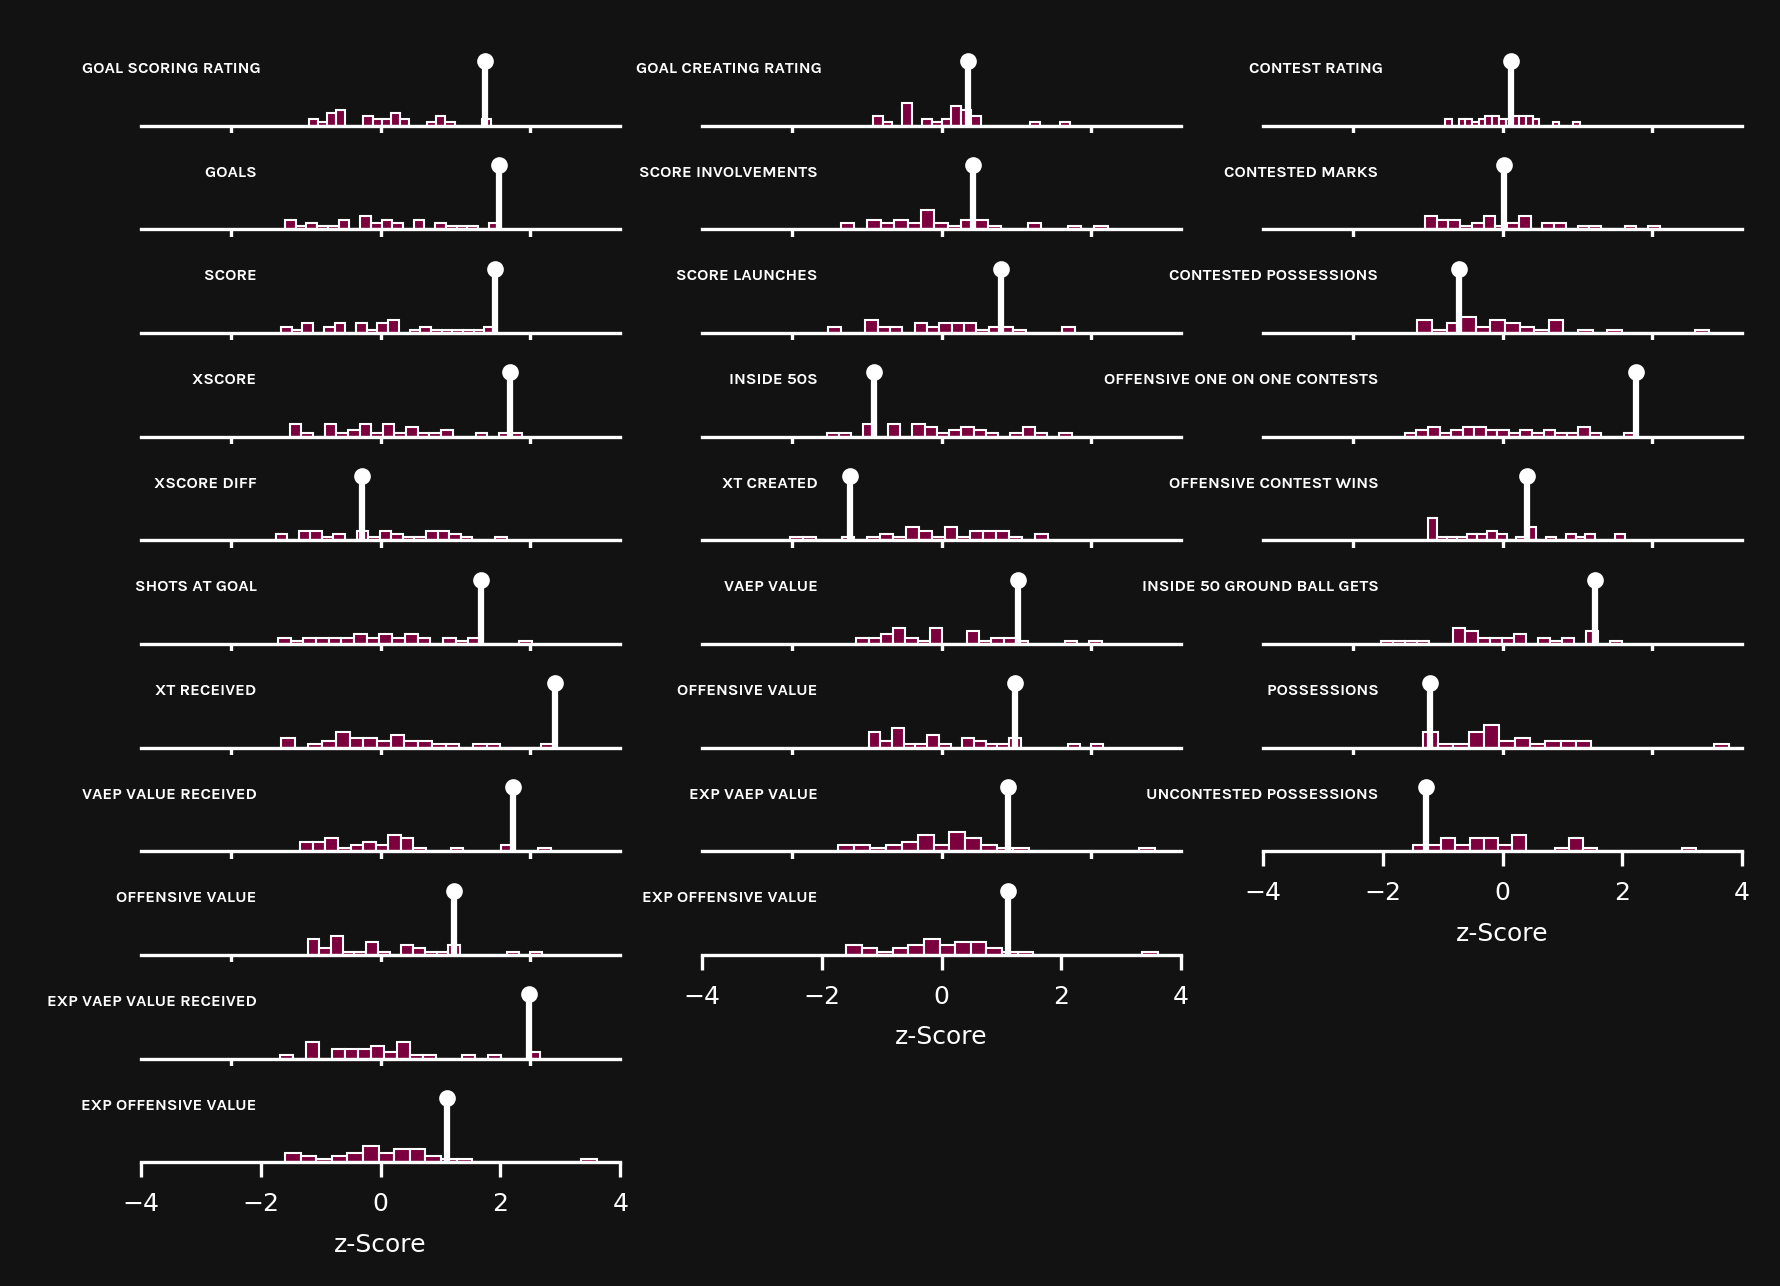

In [10]:
player = "Charlie Cameron"
team = "Brisbane Lions"
season = 2023

stats_list = [['goal_scoring_rating'] + position_role_stats_zscaled['goal_scoring'], 
              ['goal_creating_rating'] + position_role_stats_zscaled['goal_creating'], 
              ['contest_rating'] + position_role_stats_zscaled['contest']]

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4)

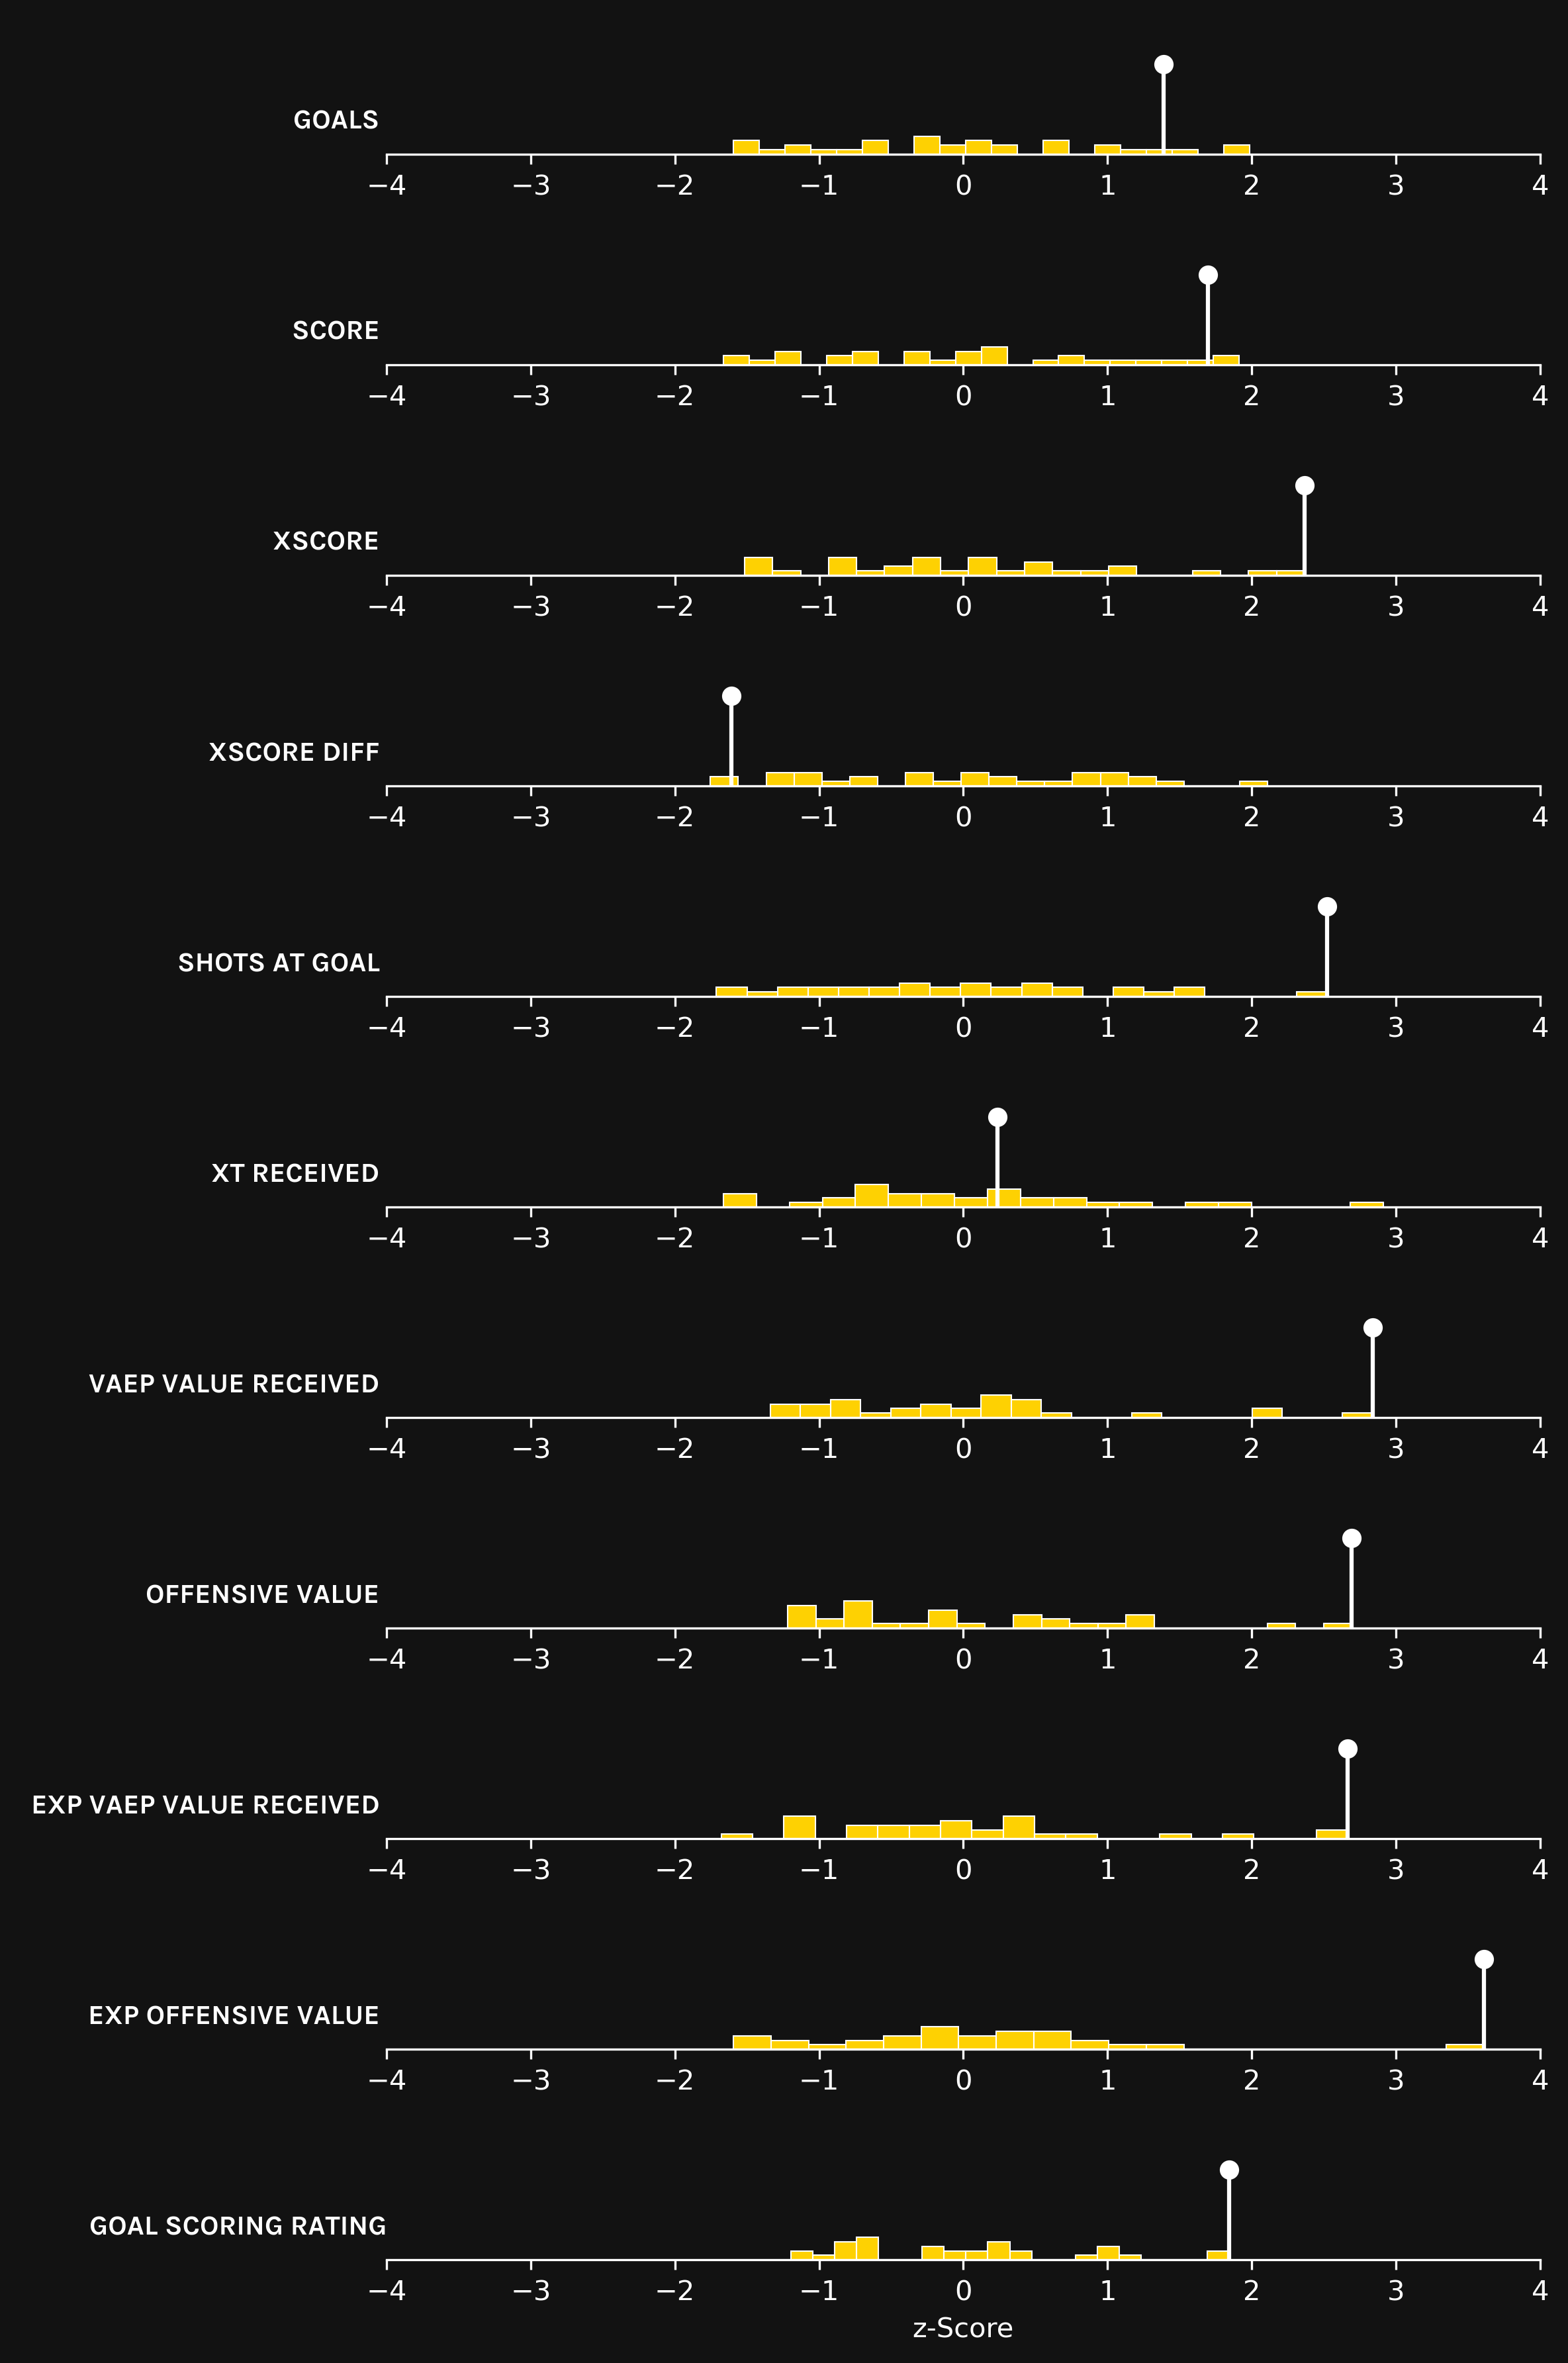

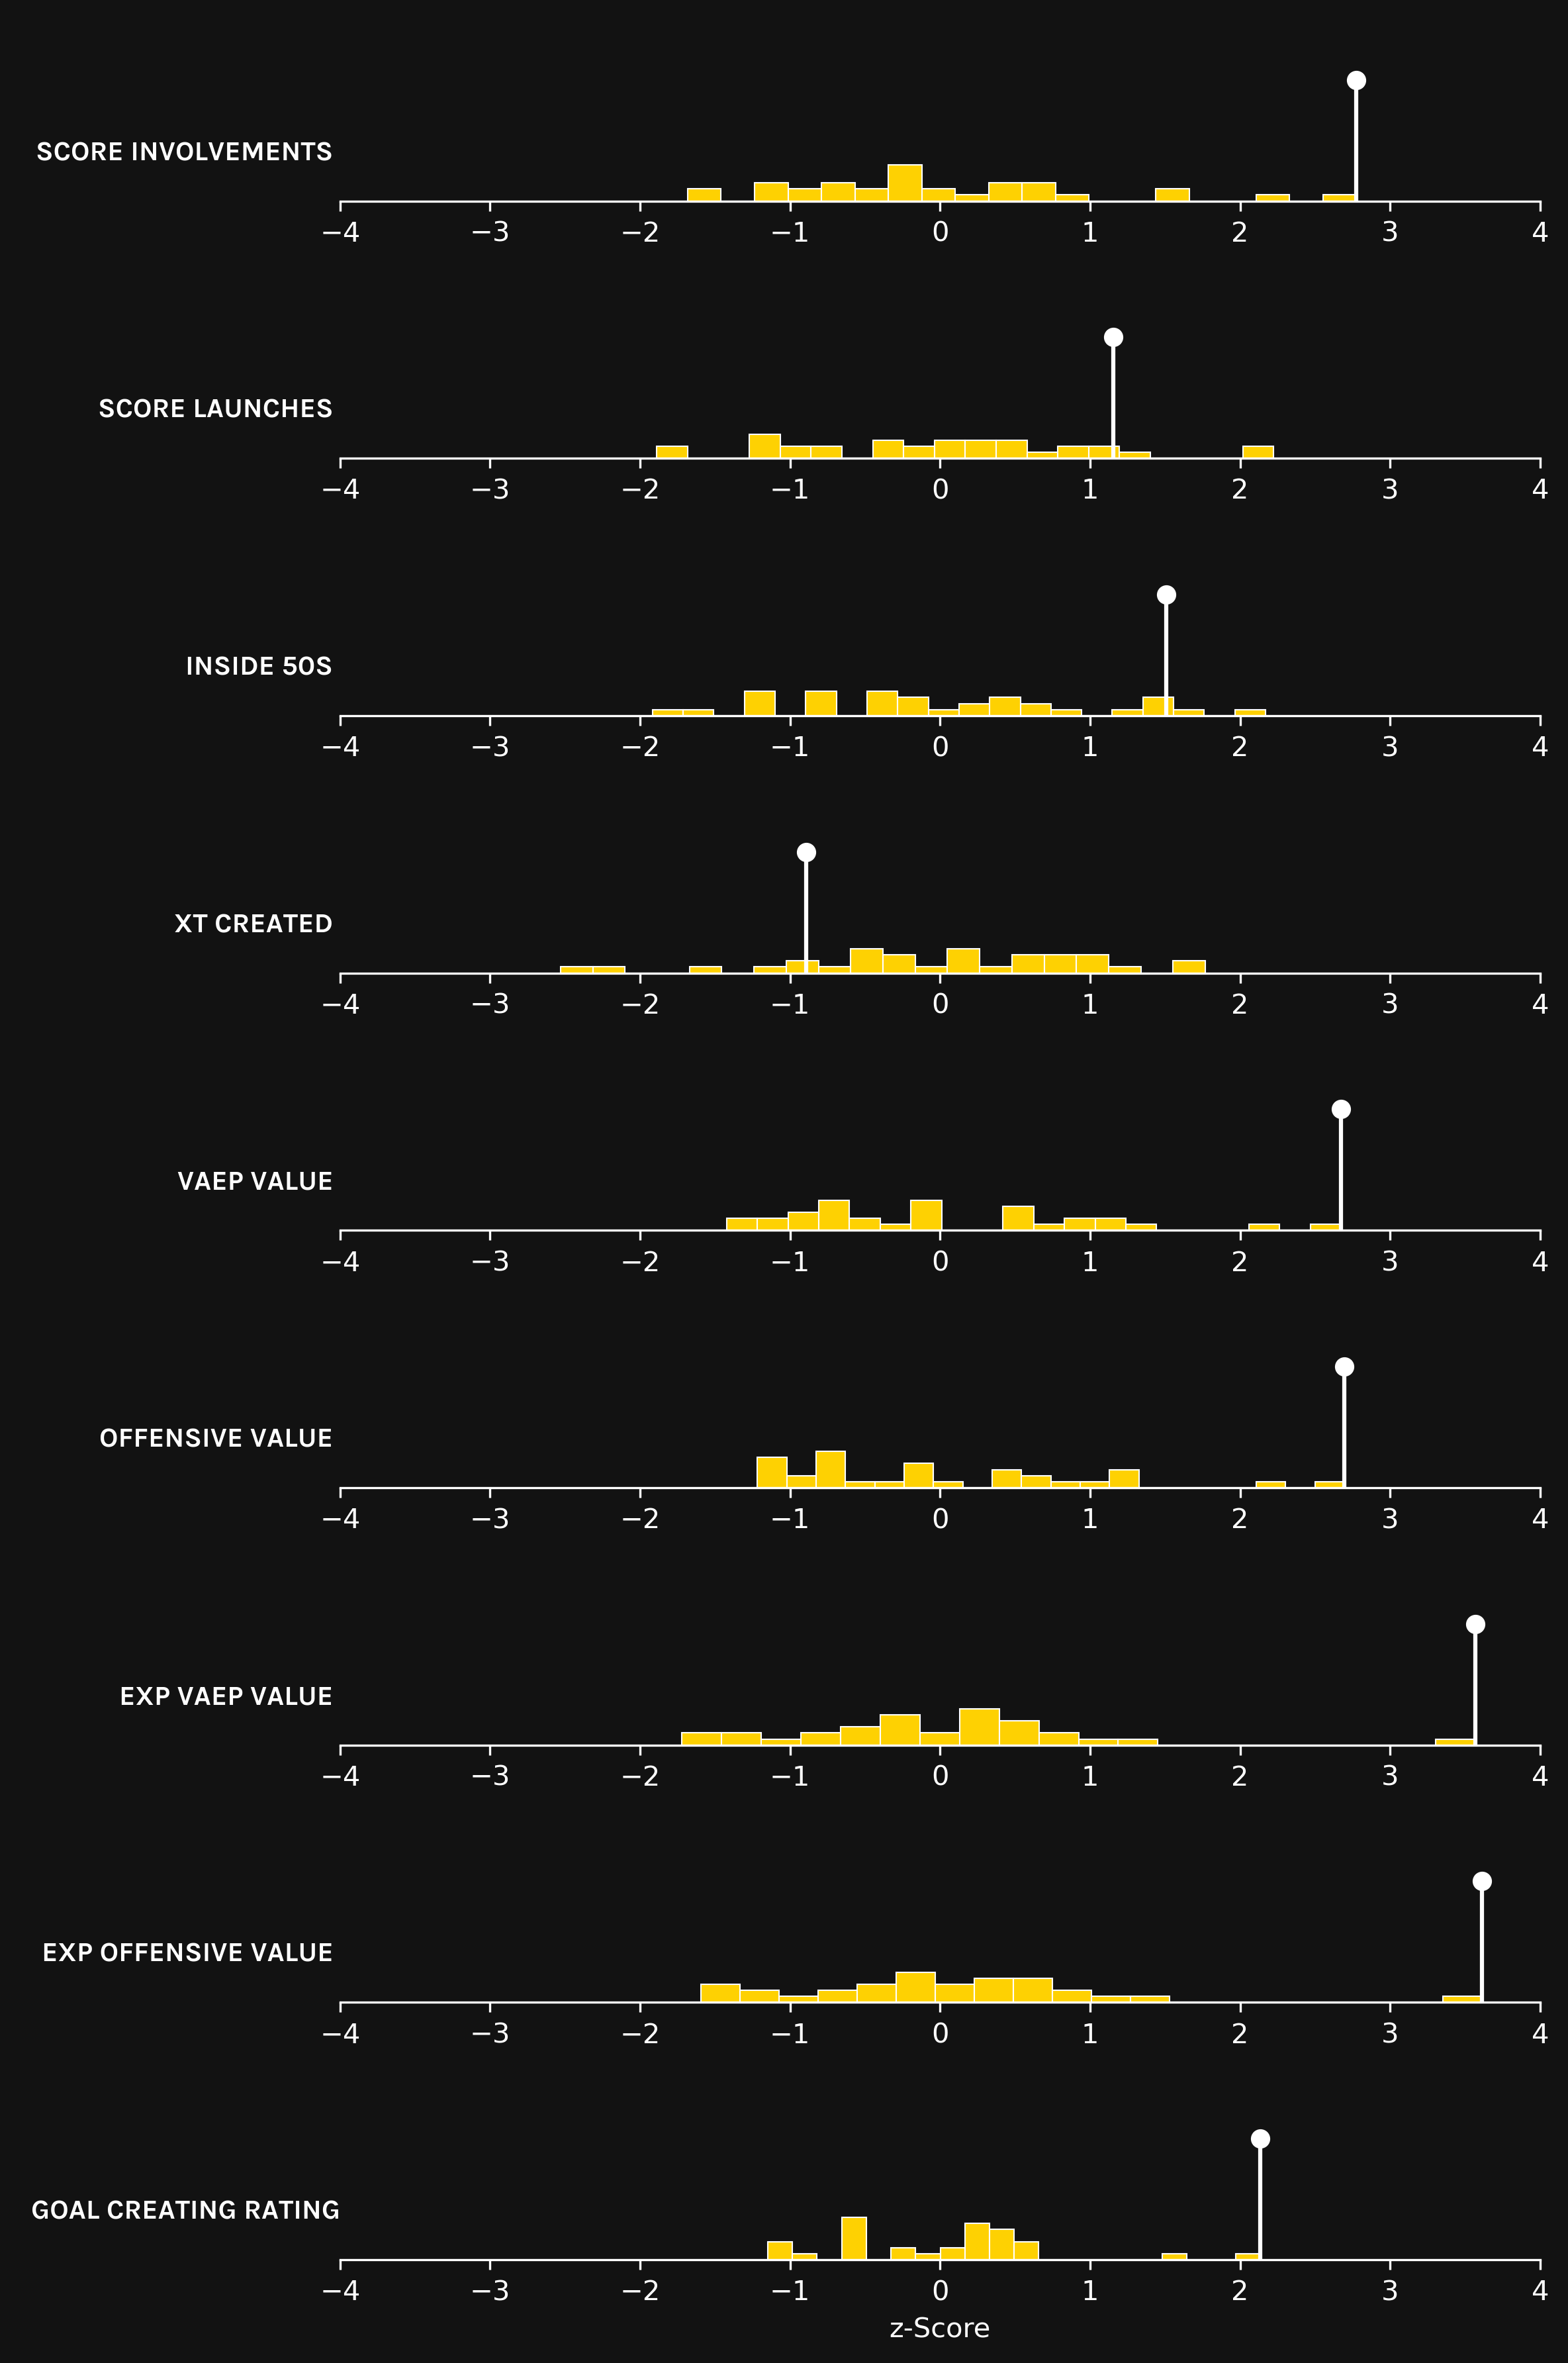

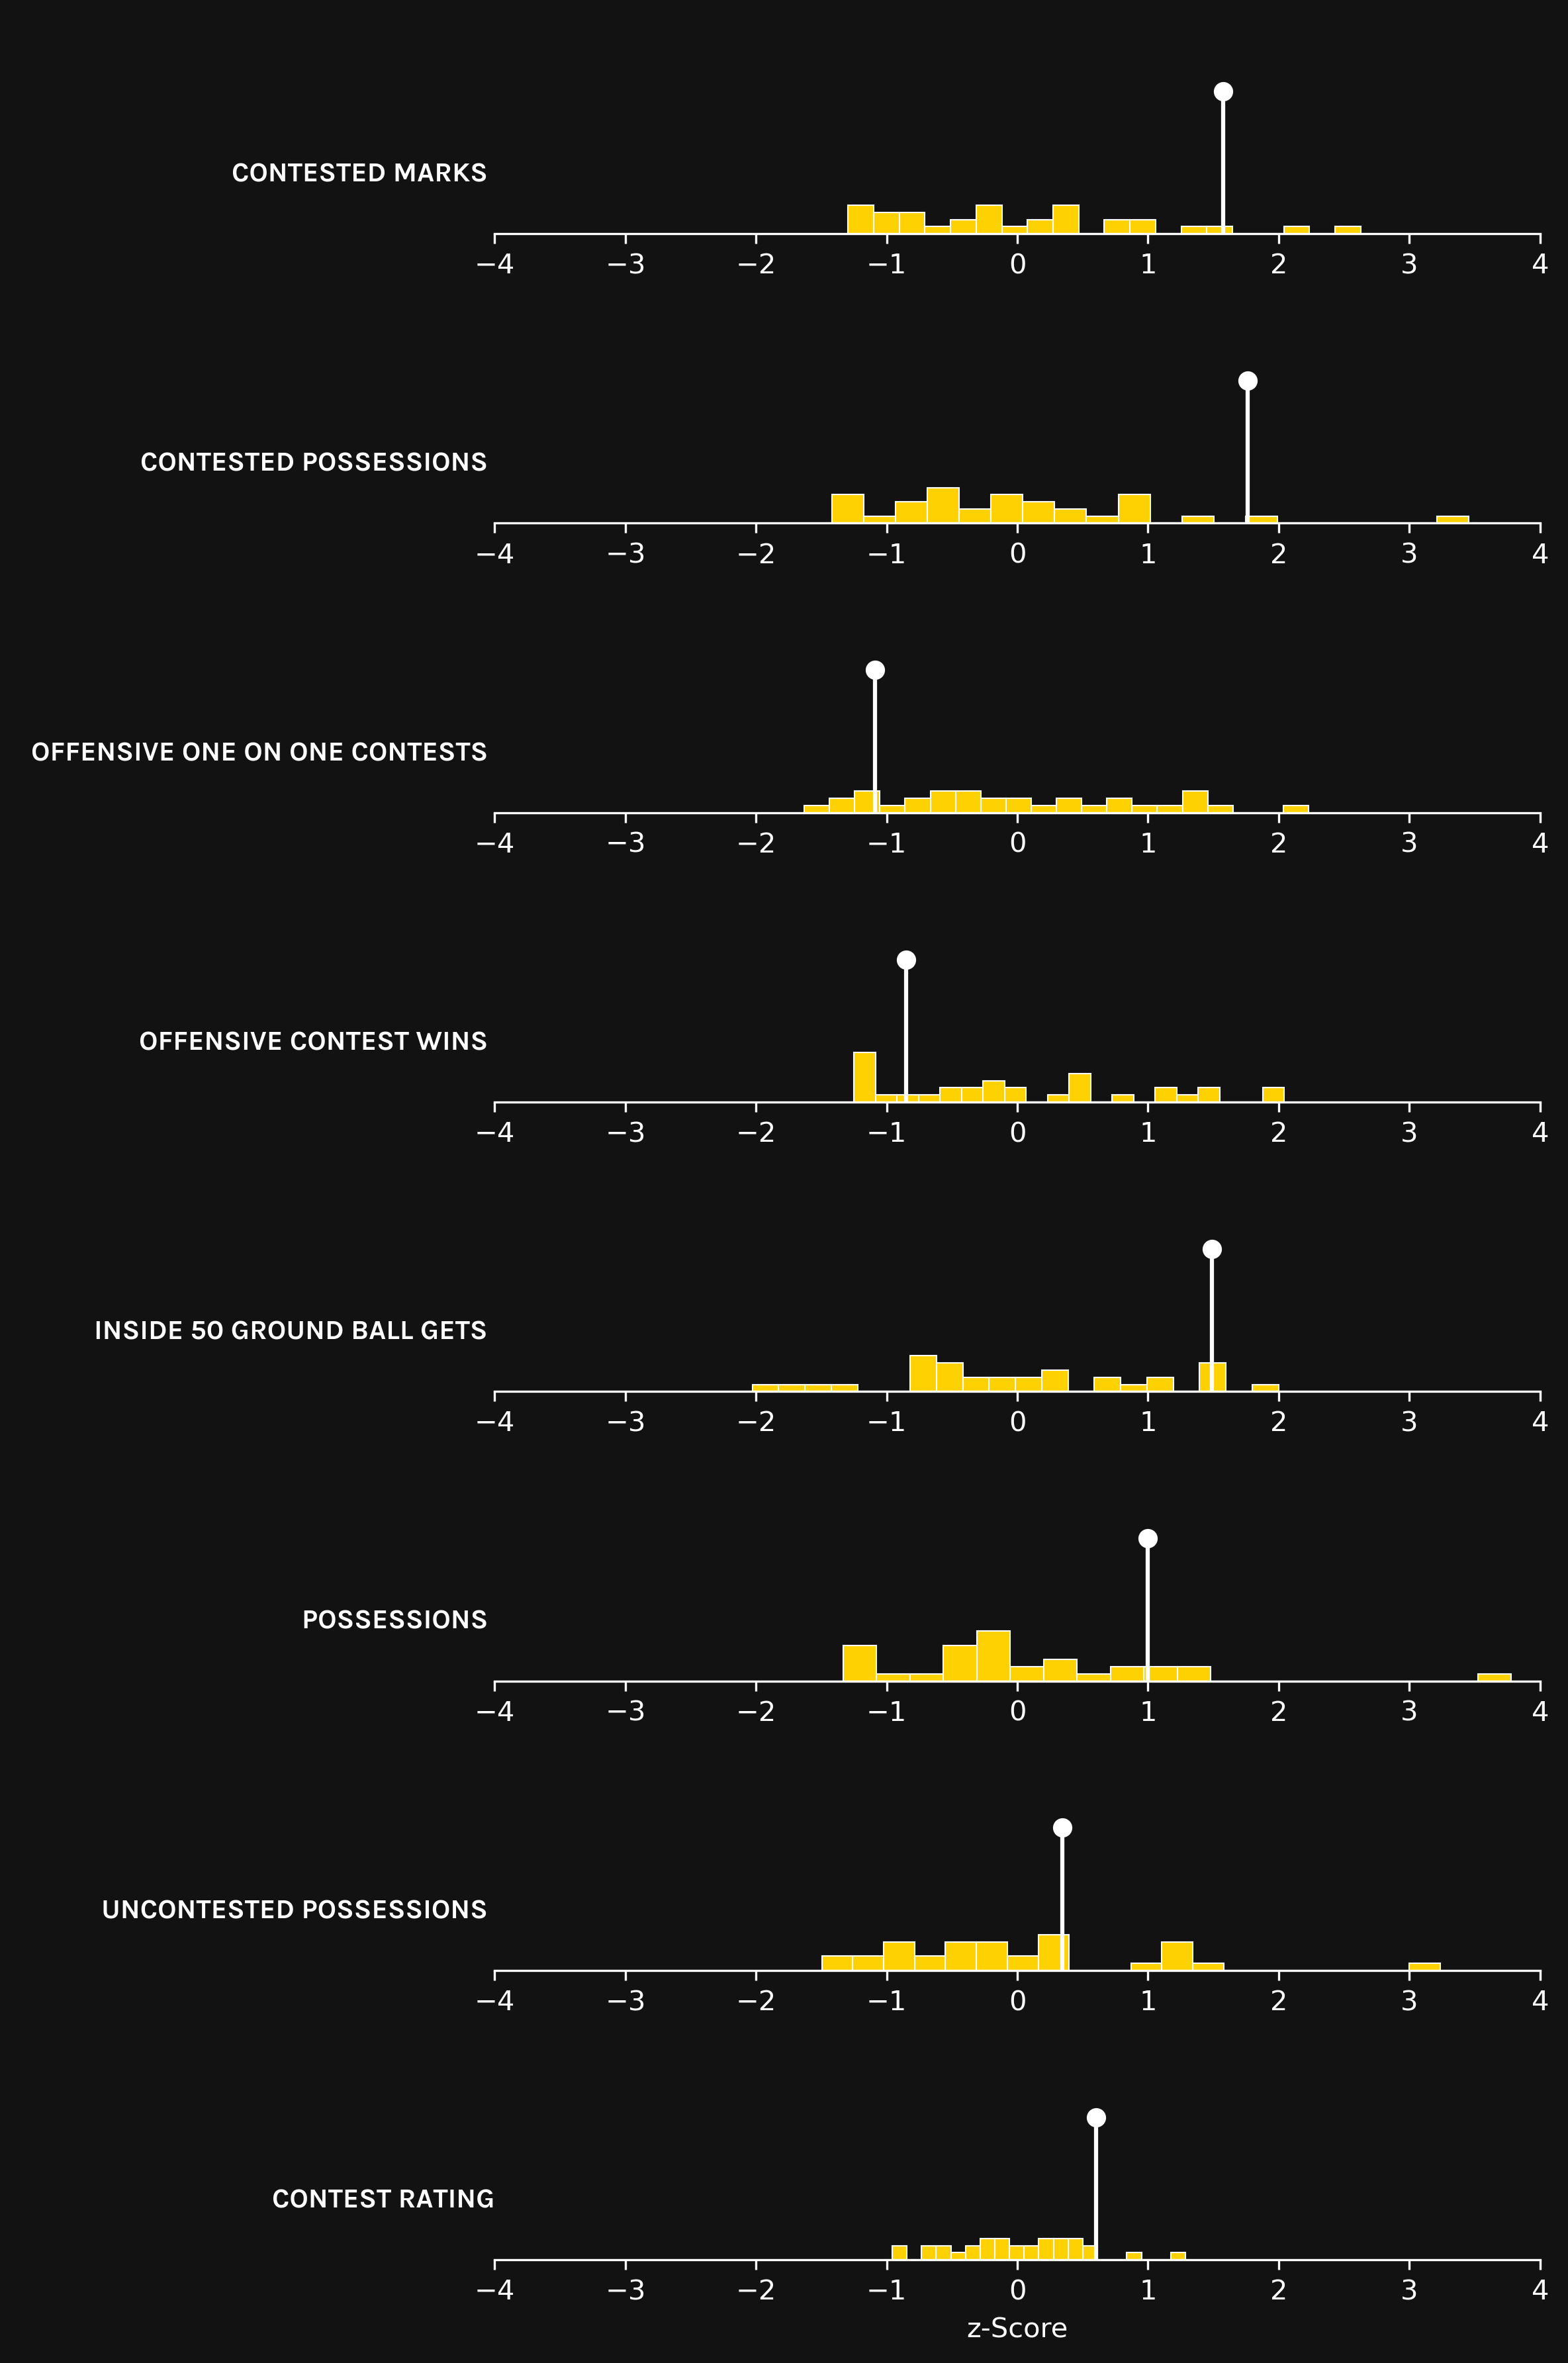

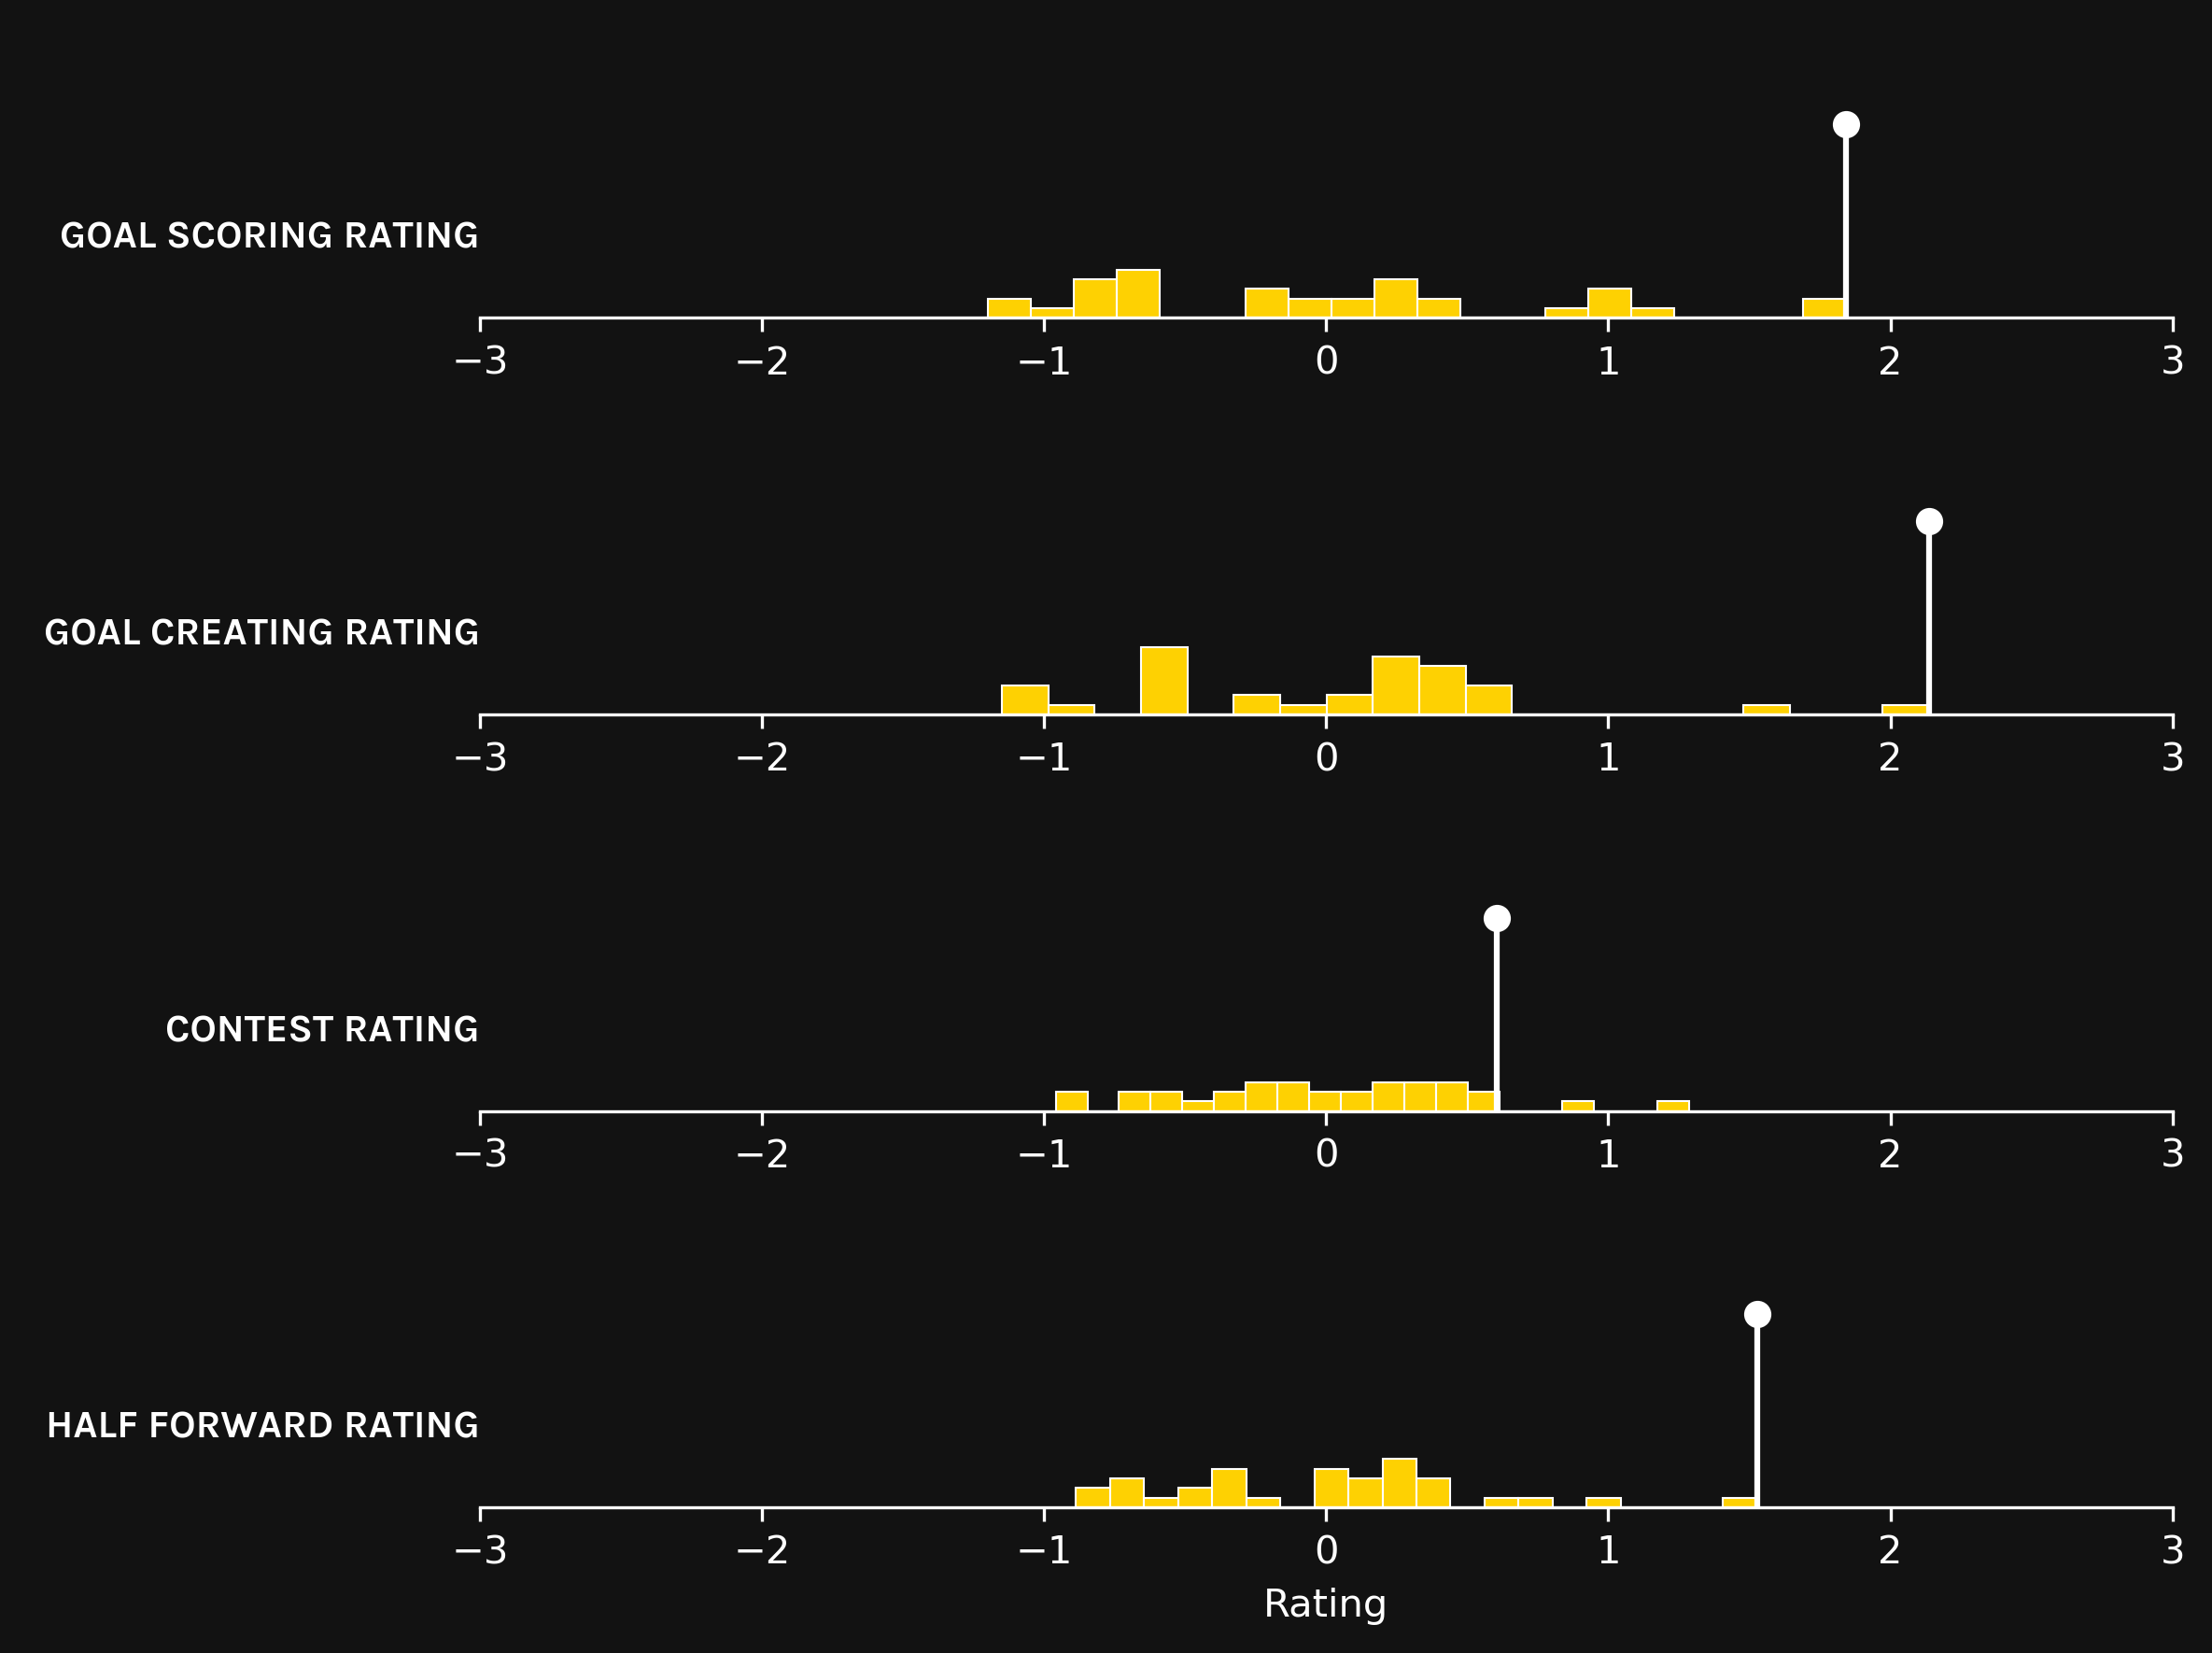

In [11]:
player = "Shai Bolton"
team = "Richmond"
season = 2022

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    